### Μηχανική Μάθηση
#### 2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

### Εισαγωγή
Στην άσκηση αυτή θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης k-Μeans, καθώς και τη μέθοδο μείωσης διαστατικότητας PCA σε υπερφασματική εικόνα.

Ονοματεπώνυμο φοιτητή: Ιωάννης Τσαντήλας

Α.Μ.: 03120883

### 1. Φόρτωση υπερφασματικής εικόνας

Κατεβάστε την υπερφασματική εικόνα `indian_pines_corrected.npy` και τις αντίστοιχες επισημειώσεις `indian_pines_gt.npy` από το Google Drive:
https://drive.google.com/drive/folders/15hbGoLga9n4K6wxRP6qsLV1P-7Nj-Vht?usp=sharing

1.α. Φορτώστε την εικόνα με χρήση της συνάρτησης numpy.load

1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά pixel εικόνας `indian_pines_gt.npy`. Οι επισημειώσεις αυτές αντιστοιχίζουν κάθε pixel της υπερφασματικής εικόνας σε ένα τύπο από 17 διαφορετικές κατηγορίες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):

```python
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]
```

In [11]:
#################################
########## Question 1a ##########
#################################
print("Question 1a")

# Importing the numpy library
# Numpy is a fundamental package for scientific computing in Python. It provides support for large,
# multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

# Paths to the hyperspectral image and the corresponding ground truth annotations.
# These paths should be updated to point to the actual location where the files are stored.
# The files can be downloaded from the provided Google Drive link.
image_path = '/content/drive/MyDrive/Machine_Learning/Lab_2/indian_pines_corrected.npy'  # Path to the hyperspectral image file
gt_path = '/content/drive/MyDrive/Machine_Learning/Lab_2/indian_pines_gt.npy'            # Path to the ground truth annotations file

# Loading the hyperspectral image and ground truth annotations using numpy's load function.
# np.load is used to load data from .npy file, which is a binary file format for persisting numpy array data.
image = np.load(image_path)                    # Load the image data
ground_truth_annotations = np.load(gt_path)    # Load the annotations data
print("")


#################################
########## Question 1b ##########
#################################
print("Question 2b")

# Defining the classes corresponding to the annotations in the ground truth data.
# Each class represents a type of land cover or crop type present in the hyperspectral image,
# and the annotations in the ground_truth_annotations array correspond to these classes.
# The first class "Undefined" is used to represent areas not covered by any of the other categories.
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]

# Printing out a sample annotation to see its class.
# This part of the code selects a specific pixel (in this case, the pixel at position (0, 0)),
# and prints out the class corresponding to its annotation.
# This helps in understanding the type of data stored in the ground_truth_annotations array and
# how it relates to the classes defined above.
sample_pixel = ground_truth_annotations[0, 0]  # Select the annotation of the pixel at position (0, 0)
print(f"Class of sample pixel: {classes[sample_pixel]}")  # Print the class of the selected pixel
print("")

Question 1a
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Question 2b
Class of sample pixel: Corn-mintill



### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας/κλάσης στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις σε μορφή εικόνας. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως).

2ε. Υπολογίστε πόσα pixels της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

Question 2a
Height: 145, Width: 145, Number of Hyperspectral Channels: 200

Question 2b


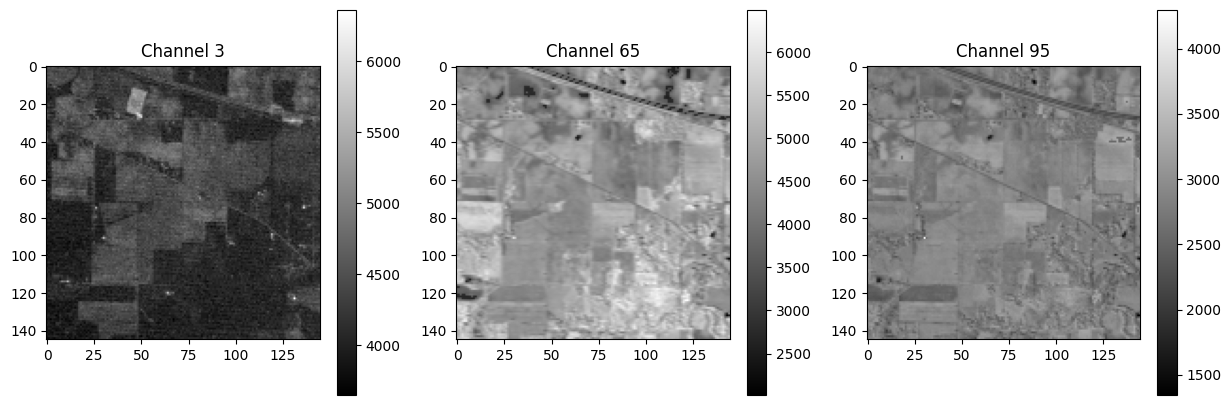


Question 2c
Number of different cultivation classes: 16

Question 2d


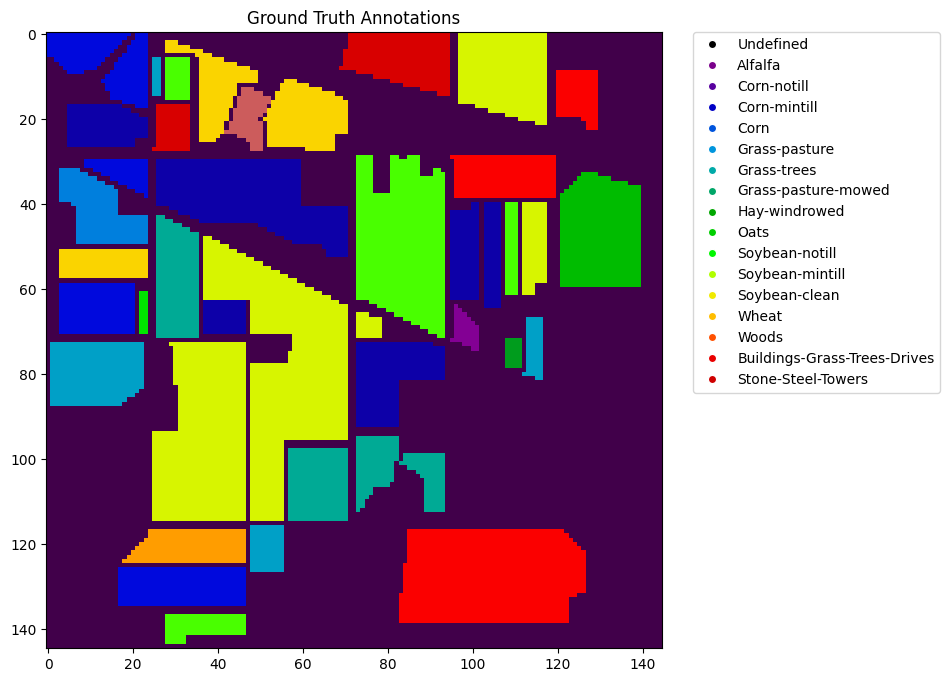


Question 2e
Pixel count per cultivation type:
Undefined: 10776
Alfalfa: 46
Corn-notill: 1428
Corn-mintill: 830
Corn: 237
Grass-pasture: 483
Grass-trees: 730
Grass-pasture-mowed: 28
Hay-windrowed: 478
Oats: 20
Soybean-notill: 972
Soybean-mintill: 2455
Soybean-clean: 593
Wheat: 205
Woods: 1265
Buildings-Grass-Trees-Drives: 386
Stone-Steel-Towers: 93



In [12]:
import matplotlib.pyplot as plt
#################################
########## Question 2a ##########
#################################
print("Question 2a")

# Extracting the shape of the hyperspectral image
# The shape will be in the form of (height, width, number of channels)
height, width, channels = image.shape

# Printing out the dimensions
print(f"Height: {height}, Width: {width}, Number of Hyperspectral Channels: {channels}")
print("")


#################################
########## Question 2b ##########
#################################
print("Question 2b")

# Creating a figure with a specific size to display the channels
plt.figure(figsize=(15, 5))

# Plotting the 3rd channel
plt.subplot(1, 3, 1)  # Creating a subplot in a 1x3 grid, at position 1
plt.imshow(image[:, :, 2], cmap='gray')  # Displaying the 3rd channel in grayscale
plt.title('Channel 3')  # Adding a title to the subplot
plt.colorbar()  # Adding a colorbar to show the intensity scale

# Plotting the 65th channel
plt.subplot(1, 3, 2)  # Position 2 in the grid
plt.imshow(image[:, :, 64], cmap='gray')
plt.title('Channel 65')
plt.colorbar()

# Plotting the 95th channel
plt.subplot(1, 3, 3)  # Position 3 in the grid
plt.imshow(image[:, :, 94], cmap='gray')
plt.title('Channel 95')
plt.colorbar()

# Displaying the figure with the plots
plt.show()
print("")



#################################
########## Question 2c ##########
#################################
print("Question 2c")

# Calculating unique classes in the ground truth annotations
unique_classes = np.unique(ground_truth_annotations)

# Counting the number of classes, excluding the 'Undefined' class
num_classes = len(unique_classes) - 1
print(f"Number of different cultivation classes: {num_classes}")
print("")



#################################
########## Question 2d ##########
#################################
print("Question 2d")

plt.figure(figsize=(8, 8))

# Displaying the ground truth annotations as an image
# Each unique value in the annotations is shown in a different color
plt.imshow(ground_truth_annotations, cmap='nipy_spectral')
plt.clim(-0.5, len(classes) - 0.5)
plt.title("Ground Truth Annotations")

# Creating a legend with class labels
legend_labels = {i: classes[i] for i in unique_classes}
patches = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=plt.cm.nipy_spectral(i / len(classes))) for i, label in legend_labels.items()]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()
print("")



#################################
########## Question 2e ##########
#################################
print("Question 2e")

# Calculating the pixel count for each type of cultivation
pixel_counts = {classes[i]: np.sum(ground_truth_annotations == i) for i in unique_classes}

# Printing the pixel count for each cultivation type
print("Pixel count per cultivation type:")
for cultivation_type, count in pixel_counts.items():
    print(f"{cultivation_type}: {count}")
print("")

### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν είναι ο αριθμός των pixels και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, αφαιρέστε όσα δεδομένα είναι επισημειωμένα ως `Undefined`.

💡 Χρησιμοποιήστε την `numpy reshape`

3.β. Επιλέξτε ένα τυχαίο pixel της εικόνας από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων pixels.

3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα.

3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

Question 3a
Shape of reshaped image: (10249, 200)
Shape of reshaped annotations: (10249,)

Question 3b
Random pixel from Alfalfa: Index 6020, Mean Spectral Value 2751.22
Random pixel from Corn-notill: Index 2047, Mean Spectral Value 2857.75
Random pixel from Corn-mintill: Index 5945, Mean Spectral Value 2683.70
Random pixel from Corn: Index 3855, Mean Spectral Value 3246.25
Random pixel from Grass-pasture: Index 9226, Mean Spectral Value 2602.22
Random pixel from Grass-trees: Index 8379, Mean Spectral Value 2539.34
Random pixel from Grass-pasture-mowed: Index 6088, Mean Spectral Value 2760.78
Random pixel from Hay-windrowed: Index 4545, Mean Spectral Value 2738.68
Random pixel from Oats: Index 5543, Mean Spectral Value 2549.01
Random pixel from Soybean-notill: Index 2225, Mean Spectral Value 2779.36
Random pixel from Soybean-mintill: Index 6204, Mean Spectral Value 2874.82
Random pixel from Soybean-clean: Index 4359, Mean Spectral Value 3018.78
Random pixel from Wheat: Index 9065, Mean

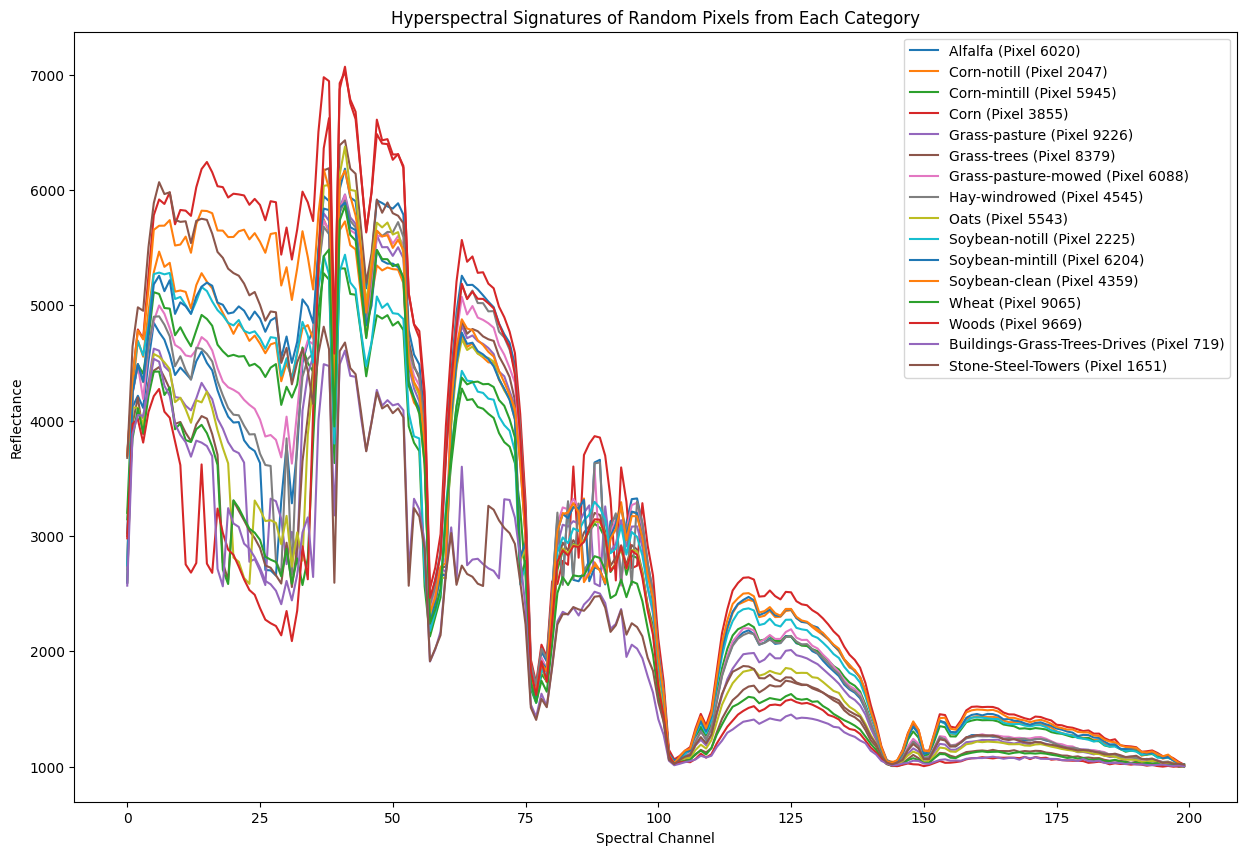


Question 3d


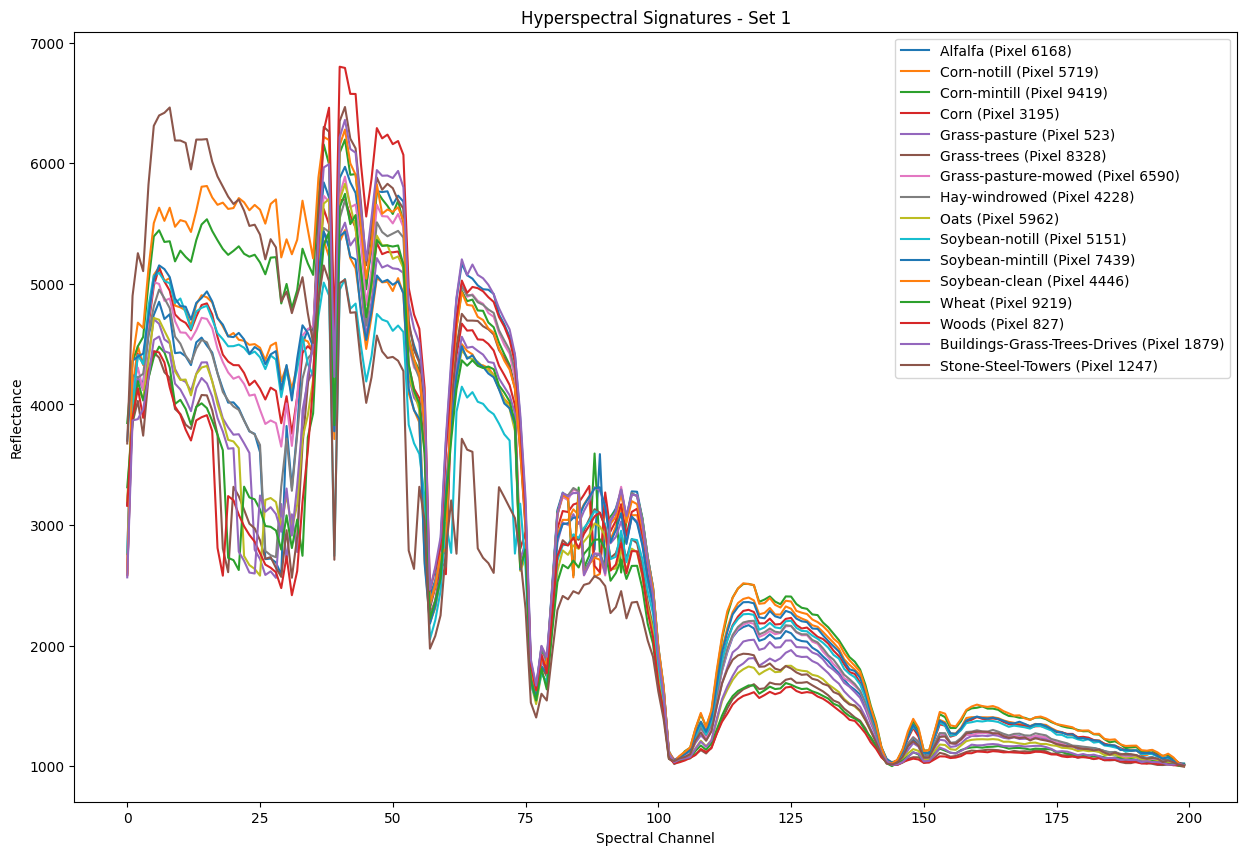

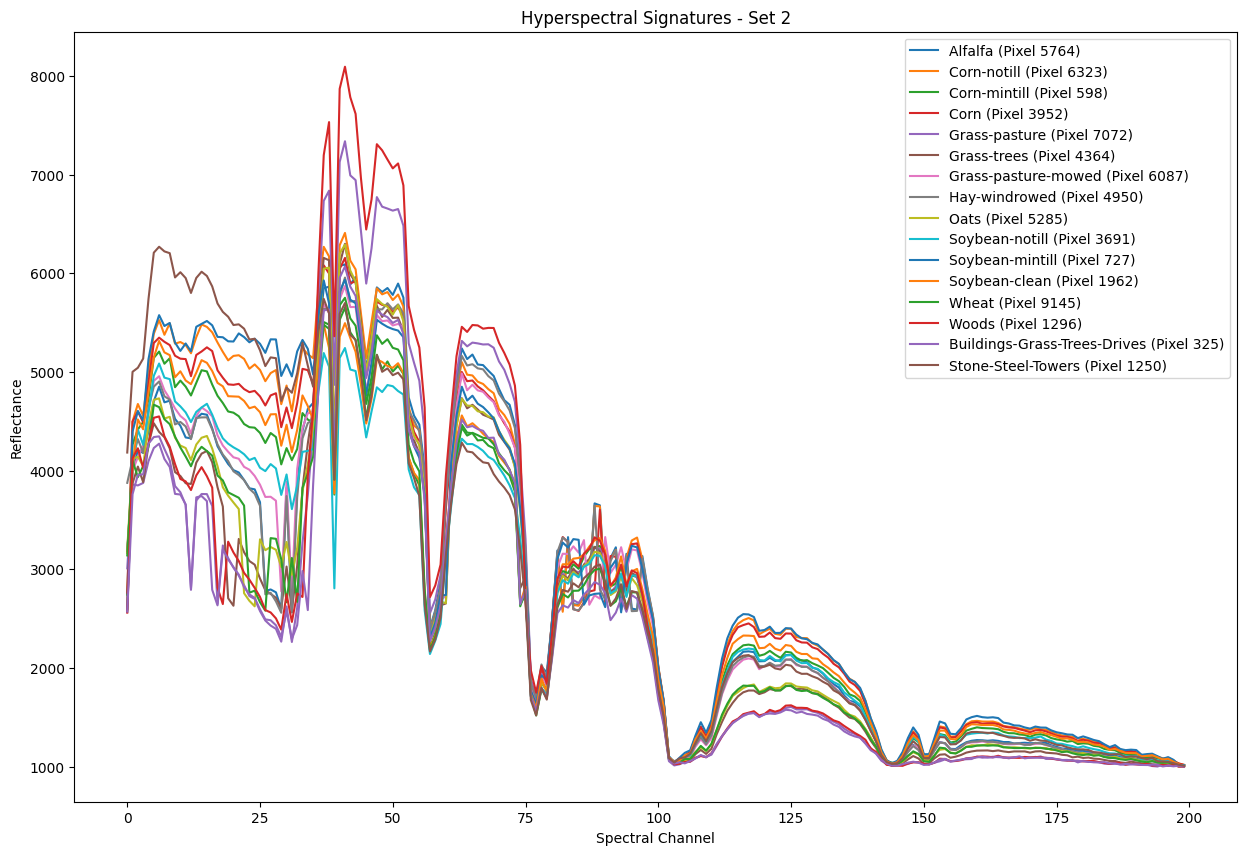


Question 3e

Με βάση τα διαγράμματα υπερφασματικών υπογραφών που παρέχονται για δύο σύνολα τυχαία επιλεγμένων εικονοστοιχείων από διάφορες κατηγορίες, μπορούμε να εξαγάγουμε διάφορες παρατηρήσεις και συμπεράσματα:

1. **Διακριτότητα των υπογραφών των καλλιεργειών**:
   - Οι φασματικές υπογραφές παρουσιάζουν διακριτά μοτίβα για διαφορετικούς τύπους καλλιεργειών, γεγονός που υποδηλώνει ότι η υπερφασματική απεικόνιση μπορεί να χρησιμοποιηθεί για τη διάκριση μεταξύ διαφόρων καλλιεργειών.
   - Καλλιέργειες όπως η μηδική και το καλαμπόκι-καλαμπόκι παρουσιάζουν μοναδικές κορυφές και κοιλίες σε ορισμένα φασματικά κανάλια, γεγονός που θα μπορούσε ενδεχομένως να τις καταστήσει ευκολότερη τη διάκρισή τους από άλλες καλλιέργειες.
   - Ωστόσο, υπάρχουν ορισμένες καλλιέργειες των οποίων οι υπογραφές φαίνεται να επικαλύπτονται σημαντικά με άλλες (π.χ. διαφορετικοί τύποι σόγιας), γεγονός που καθιστά δυσκολότερη τη διάκρισή τους με βάση μόνο τις φασματικές τους υπογραφές.

2. **Μεταβλητότητα εντός των

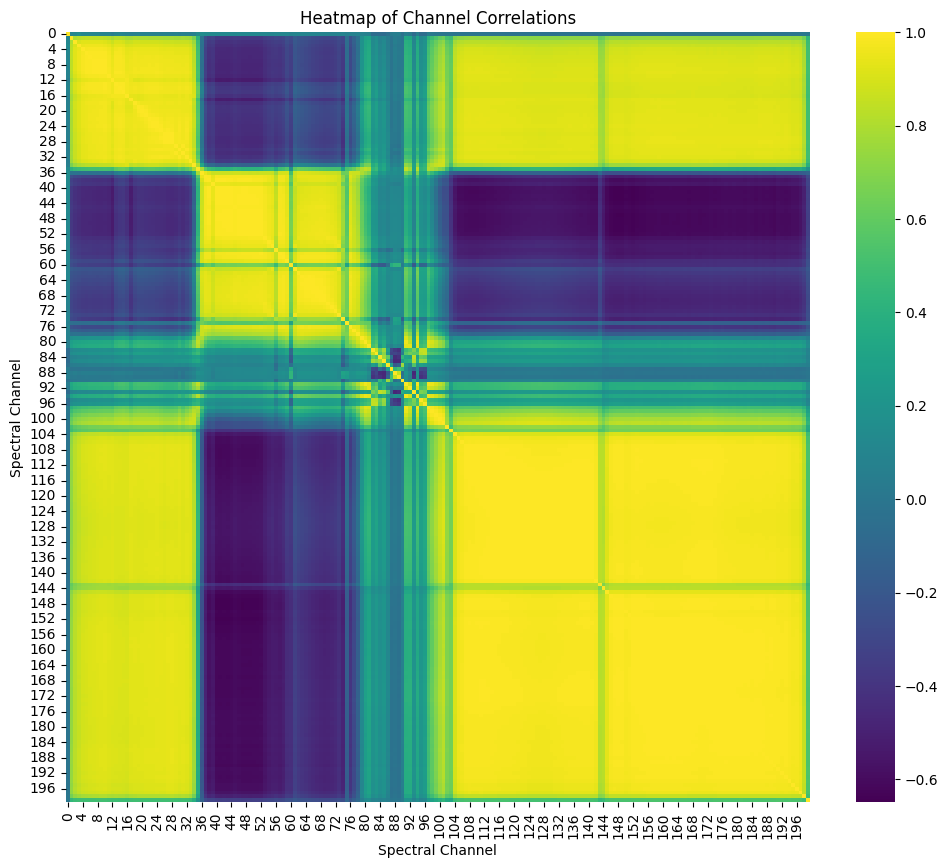

In [15]:
import seaborn as sns
import random
#################################
########## Question 3a ##########
#################################
print("Question 3a")

# Reshaping the hyperspectral image to a 2D array for processing
# The new shape will be (N, K) where N is the total number of pixels (height*width) and K is the number of channels
height, width, K = image.shape  # Extract original dimensions
N = height * width  # Total number of pixels
reshaped_image = image.reshape((N, K))

# Flatten the annotations to create a vector of length N
reshaped_annotations = ground_truth_annotations.flatten()

# Filtering out data labeled as 'Undefined' (class 0)
defined_indices = reshaped_annotations != 0  # True for all pixels not labeled as 'Undefined'
filtered_image = reshaped_image[defined_indices]
filtered_annotations = reshaped_annotations[defined_indices]

# Confirming the new shapes of the reshaped and filtered data
print("Shape of reshaped image:", filtered_image.shape)
print("Shape of reshaped annotations:", filtered_annotations.shape)
print("")



#################################
########## Question 3b ##########
#################################
print("Question 3b")

# Storing a random pixel index and its mean value for each category
random_pixel_info = {}

# Loop through each category (excluding 'Undefined')
for category in range(1, len(classes)):
    # Indices of pixels belonging to the current category
    category_indices = np.where(filtered_annotations == category)[0]

    # Randomly select an index if the category is present
    if len(category_indices) > 0:
        random_index = random.choice(category_indices)
        random_pixel = filtered_image[random_index]
        random_pixel_mean = np.mean(random_pixel)
        random_pixel_info[classes[category]] = (random_index, random_pixel_mean)

# Displaying the selected random pixels
for category, info in random_pixel_info.items():
    print(f"Random pixel from {category}: Index {info[0]}, Mean Spectral Value {info[1]:.2f}")
print("")



#################################
########## Question 3c ##########
#################################
print("Question 3c")

# Plotting the spectral signatures for each selected pixel
plt.figure(figsize=(15, 10))

# Loop through each category and plot its spectral signature
for category, (index, _) in random_pixel_info.items():
    pixel_values = filtered_image[index]
    plt.plot(pixel_values, label=f"{category} (Pixel {index})")

plt.title('Hyperspectral Signatures of Random Pixels from Each Category')
plt.xlabel('Spectral Channel')
plt.ylabel('Reflectance')
plt.legend()
plt.show()
print("")



#################################
########## Question 3d ##########
#################################
print("Question 3d")

# Initializing a dictionary to store the index of a randomly selected pixel for each category
random_pixel_info_set1 = {}

# Looping through each category (excluding 'Undefined')
for category in range(1, len(classes)):  # Start from 1 to skip 'Undefined'
    # Finding indices of all pixels belonging to the current category
    category_indices = np.where(filtered_annotations == category)[0]

    # Randomly selecting an index if the category is present
    if len(category_indices) > 0:
        random_index = random.choice(category_indices)
        random_pixel_info_set1[classes[category]] = random_index

# Plotting the spectral signatures for the first set of random pixels
plt.figure(figsize=(15, 10))
for category, index in random_pixel_info_set1.items():
    pixel_values = filtered_image[index]
    plt.plot(pixel_values, label=f"{category} (Pixel {index})")

plt.title('Hyperspectral Signatures - Set 1')
plt.xlabel('Spectral Channel')
plt.ylabel('Reflectance')
plt.legend()
plt.show()


# Similar to the first set, this dictionary will store the index of a randomly selected pixel for each category
random_pixel_info_set2 = {}

# Looping through each category (excluding 'Undefined')
for category in range(1, len(classes)):
    category_indices = np.where(filtered_annotations == category)[0]

    if len(category_indices) > 0:
        random_index = random.choice(category_indices)
        random_pixel_info_set2[classes[category]] = random_index

# Plotting the spectral signatures for the second set of random pixels
plt.figure(figsize=(15, 10))
for category, index in random_pixel_info_set2.items():
    pixel_values = filtered_image[index]
    plt.plot(pixel_values, label=f"{category} (Pixel {index})")

plt.title('Hyperspectral Signatures - Set 2')
plt.xlabel('Spectral Channel')
plt.ylabel('Reflectance')
plt.legend()
plt.show()

print("")



#################################
########## Question 3e ##########
#################################
print("Question 3e")

print("""
Με βάση τα διαγράμματα υπερφασματικών υπογραφών που παρέχονται για δύο σύνολα τυχαία επιλεγμένων εικονοστοιχείων από διάφορες κατηγορίες, μπορούμε να εξαγάγουμε διάφορες παρατηρήσεις και συμπεράσματα:

1. **Διακριτότητα των υπογραφών των καλλιεργειών**:
   - Οι φασματικές υπογραφές παρουσιάζουν διακριτά μοτίβα για διαφορετικούς τύπους καλλιεργειών, γεγονός που υποδηλώνει ότι η υπερφασματική απεικόνιση μπορεί να χρησιμοποιηθεί για τη διάκριση μεταξύ διαφόρων καλλιεργειών.
   - Καλλιέργειες όπως η μηδική και το καλαμπόκι-καλαμπόκι παρουσιάζουν μοναδικές κορυφές και κοιλίες σε ορισμένα φασματικά κανάλια, γεγονός που θα μπορούσε ενδεχομένως να τις καταστήσει ευκολότερη τη διάκρισή τους από άλλες καλλιέργειες.
   - Ωστόσο, υπάρχουν ορισμένες καλλιέργειες των οποίων οι υπογραφές φαίνεται να επικαλύπτονται σημαντικά με άλλες (π.χ. διαφορετικοί τύποι σόγιας), γεγονός που καθιστά δυσκολότερη τη διάκρισή τους με βάση μόνο τις φασματικές τους υπογραφές.

2. **Μεταβλητότητα εντός των κατηγοριών καλλιεργειών**:
   - Συγκρίνοντας το σύνολο 1 και το σύνολο 2, παρατηρούμε ότι εντός μιας ενιαίας κατηγορίας καλλιέργειας μπορεί να υπάρχει μεταβλητότητα στη φασματική υπογραφή από το ένα εικονοστοιχείο στο άλλο. Αυτή η μεταβλητότητα εντός της κατηγορίας μπορεί
     να προκύψει λόγω διαφορών στην υγεία της καλλιέργειας, στον τύπο του εδάφους, στα επίπεδα υγρασίας και σε άλλους περιβαλλοντικούς παράγοντες.

3. **Σημαντικότητα καναλιού**:
   - Δεν συμβάλλουν όλα τα κανάλια εξίσου στη διαχωρισιμότητα των καλλιεργειών. Ορισμένα κανάλια φαίνεται να είναι πιο κατατοπιστικά, όπως υποδεικνύεται από τις κορυφές και τις κοιλότητες που είναι διακριτές σε διαφορετικούς τύπους καλλιεργειών.
     Για παράδειγμα, τα κανάλια στα οποία οι τιμές της ανακλαστικότητας αποκλίνουν περισσότερο για διαφορετικές καλλιέργειες είναι πιθανώς πιο χρήσιμα για σκοπούς ταξινόμησης.
   - Τα κανάλια στα οποία όλοι οι τύποι καλλιεργειών έχουν παρόμοιες τιμές ανακλαστικότητας μπορεί να έχουν λιγότερες διαχωριστικές πληροφορίες. Ωστόσο, τα κανάλια αυτά μπορεί να συμβάλλουν στο συνολικό μοτίβο που καθορίζει τη φασματική υπογραφή
     μιας καλλιέργειας.

4. **Επικάλυψη και διαχωρισιμότητα**:
   - Υπάρχει κάποιος βαθμός επικάλυψης μεταξύ των φασματικών υπογραφών διαφορετικών τύπων καλλιεργειών. Αυτή η επικάλυψη υποδηλώνει ότι ενώ οι φασματικές υπογραφές μπορούν να χρησιμοποιηθούν για τη διάκριση των καλλιεργειών, πρόσθετες πληροφορίες
     ή προηγμένες τεχνικές επεξεργασίας (όπως φασματική ανάμειξη ή αλγόριθμοι ταξινόμησης μηχανικής μάθησης) μπορεί να είναι απαραίτητες για ακριβέστερη διαφοροποίηση, ιδίως μεταξύ παρόμοιων τύπων καλλιεργειών.
   - Οι περιοχές του φάσματος όπου οι υπογραφές διαχωρίζονται καλά θα μπορούσαν να αξιοποιηθούν για την ακριβή ταξινόμηση αυτών των καλλιεργειών. Ο προσδιορισμός αυτών των βασικών φασματικών καναλιών μπορεί να βελτιστοποιήσει τους αλγορίθμους
     ταξινόμησης και να μειώσει την υπολογιστική πολυπλοκότητα.

5. **Εφαρμογές για την ταξινόμηση**:
   - Η μεταβλητότητα και η επικάλυψη των φασματικών υπογραφών υποδηλώνουν ότι μια απλή ταξινόμηση με βάση το κατώφλι δεν θα ήταν αποτελεσματική. Μια πιο εξελιγμένη προσέγγιση, που ενδεχομένως περιλαμβάνει μοντέλα μηχανικής μάθησης που μπορούν
    να συλλάβουν σύνθετα πρότυπα και σχέσεις στα δεδομένα, θα ήταν πιο κατάλληλη για την ταξινόμηση αυτών των καλλιεργειών.
   - Είναι επίσης προφανές ότι ορισμένα κανάλια μπορεί να είναι περιττά ή άσχετα με την ταξινόμηση. Θα μπορούσαν να εφαρμοστούν τεχνικές επιλογής χαρακτηριστικών ή μείωσης της διαστατικότητας για τον εντοπισμό και τη διατήρηση των πιο
    κατατοπιστικών καναλιών, βελτιώνοντας έτσι την αποτελεσματικότητα και την ακρίβεια της ταξινόμησης.

Συνοψίζοντας, οι φασματικές υπογραφές υποδεικνύουν δυνατότητες ταξινόμησης των τύπων καλλιεργειών με τη χρήση υπερφασματικών απεικονίσεων, αλλά το έργο δεν είναι τετριμμένο λόγω της μεταβλητότητας εντός των κλάσεων και της επικάλυψης
 μεταξύ τους. Απαιτούνται προηγμένες αναλυτικές τεχνικές για την πλήρη αξιοποίηση των πλούσιων πληροφοριών που περιέχονται στα υπερφασματικά δεδομένα για την ακριβή ταξινόμηση των καλλιεργειών.
""")

print("")



#################################
########## Question 3st ##########
#################################
print("Question 3st")

# Calculate the correlation matrix between different spectral channels
correlation_matrix = np.corrcoef(filtered_image.T)  # Transposing to treat channels as features

# Plotting the heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='viridis', annot=False)
plt.title('Heatmap of Channel Correlations')
plt.xlabel('Spectral Channel')
plt.ylabel('Spectral Channel')
plt.show()
print("")

### 4. Συσταδοποίηση με χρήση του αλγορίθμου k-Means

 4.α. Εφαρμόστε τον αλγόριθμο k-Means (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχίσουμε τα διαφορετικά ID των clusters στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχισμένα predicted labels).

4.ε. Όπως στο 2.δ. σχεδιάστε με χρήση της matplotlib τα predicted labels σε μορφή εικόνας.

Question 3a


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Shape of cluster assignments: (10249,)

Question 3b
map: 0 --> 10
map: 1 --> 13
map: 2 --> 8
map: 3 --> 0
map: 4 --> 1
map: 5 --> 3
map: 6 --> 4
map: 7 --> 5
map: 8 --> 2
map: 9 --> 7
map: 10 --> 6
map: 11 --> 14
map: 12 --> 11
map: 13 --> 15
map: 14 --> 9
map: 15 --> 12
Accuracy Score: 0.12645136110840083
Rand Score: 0.8513591775561355
Silhouette Score: 0.2822834484654961

Question 3c


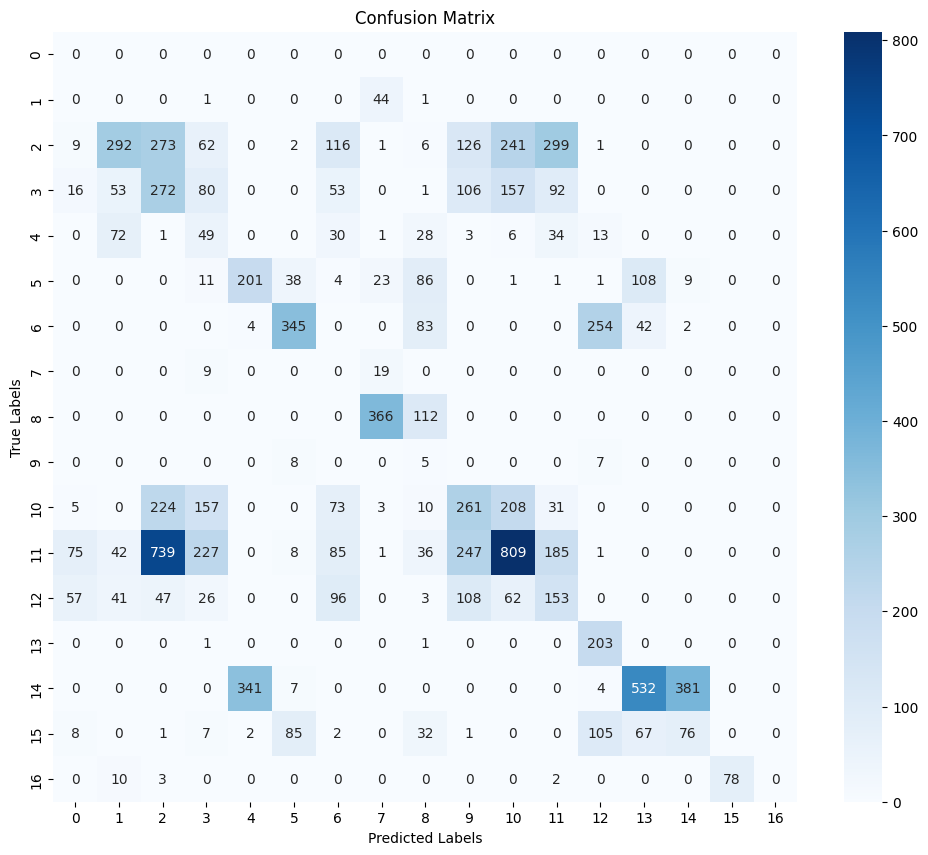


Question 3d


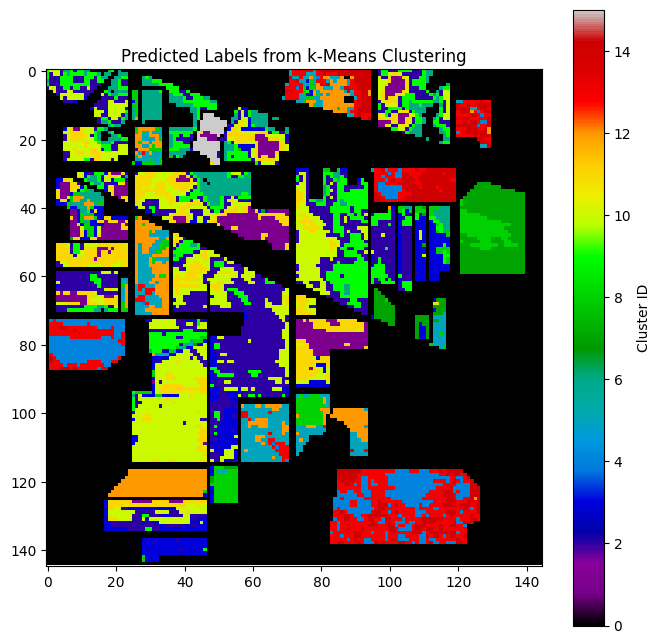

In [20]:
#################################
########## Question 4a ##########
#################################
print("Question 4a")

from sklearn.cluster import KMeans

# Define the number of desired clusters - this should match the number of categories (excluding 'Undefined')
n_clusters = 16

# Initialize k-Means with the specified number of clusters and a random state for reproducibility
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the k-Means model to the reshaped and filtered hyperspectral image data
kmeans.fit(filtered_image)

# Retrieve the cluster labels from the k-Means algorithm
cluster_assignments = kmeans.labels_

# Output the shape of the cluster assignments to verify the results
print("Shape of cluster assignments:", cluster_assignments.shape)
print("")



#################################
########## Question 4b ##########
#################################
print("Question 4b")
from sklearn.metrics import confusion_matrix, rand_score, silhouette_score
!pip install munkres
from munkres import Munkres

from sklearn.metrics import confusion_matrix, rand_score, silhouette_score
from munkres import Munkres

def make_cost_matrix(c1, c2):
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size

    m = np.zeros([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] = -m_ij.size
    return m


def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y

# Translate the cluster assignments to best match the ground truth categories
translated_predicted_y = translate_predicted_labels(cluster_assignments, filtered_annotations)

# Calculate the confusion matrix using the true and translated predicted labels
cm = confusion_matrix(filtered_annotations, translated_predicted_y)

# Calculate and print the accuracy score
acc = accuracy(cm)
print("Accuracy Score:", acc)

# Calculate and print the Rand Score
rand_sc = rand_score(filtered_annotations, cluster_assignments)
print("Rand Score:", rand_sc)

# Calculate and print the Silhouette Score
silhouette_sc = silhouette_score(filtered_image, cluster_assignments)
print("Silhouette Score:", silhouette_sc)
print("")


#################################
########## Question 4c ##########
#################################
print("Question 4c")

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print("")



#################################
########## Question 4d ##########
#################################
print("Question 4d")

# Prepare an array to hold the complete set of predictions
complete_predictions = np.zeros_like(ground_truth_annotations)

# Place the translated predicted labels into the array at positions corresponding to defined indices
defined_indices = ground_truth_annotations != 0
complete_predictions[defined_indices] = translated_predicted_y

# Visualize the predicted labels as an image
plt.figure(figsize=(8, 8))
plt.imshow(complete_predictions, cmap='nipy_spectral')
plt.colorbar(label='Cluster ID')
plt.title("Predicted Labels from k-Means Clustering")
plt.show()
print("")

### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [22]:
#################################
########## Question 5a ##########
#################################
print("Question 5a")
from sklearn.decomposition import PCA

# Set the number of principal components to retain
n_components = 3

# Initialize PCA with the specified number of principal components
# PCA is a linear dimensionality reduction technique that seeks to project the data onto a lower-dimensional space
pca = PCA(n_components=n_components)

# Apply PCA to the filtered image data to derive the principal components
# The fit_transform method fits the PCA model with the data and applies the dimensionality reduction on it
pca_transformed_data = pca.fit_transform(filtered_image)

# Display the new shape of the data after PCA transformation
# The new shape will have as many columns as the number of principal components
print("Shape of PCA transformed data:", pca_transformed_data.shape)
print("")



#################################
########## Question 5b ##########
#################################
print("Question 5b")

# PCA provides an attribute 'explained_variance_ratio_' which returns the percentage of variance explained by each of the selected components
# This is useful to understand how much information is compressed into the principal components

# Retrieve the variance ratio of the principal components
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the total variance explained by the first three principal components
# Multiplying by 100 to convert the ratio to a percentage
total_variance_explained = np.sum(explained_variance_ratio) * 100

# Print out the total percentage of variance explained by the three principal components
print(f"Percentage of Variance Explained by the First 3 Components: {total_variance_explained:.2f}%")

Question 5a
Shape of PCA transformed data: (10249, 3)

Question 5b
Percentage of Variance Explained by the First 3 Components: 94.20%


### 6. Συνδυασμός μείωσης διαστατικότητας και k-Means

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και για κάθε μία από αυτές τις τιμές τρέξτε εκ νέου τον k-Μeans, υπολογίζοντας τα τελικά scores. Για κάθε μετρική, φτιάξτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

Question 6a


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 9
map: 1 --> 13
map: 2 --> 10
map: 3 --> 7
map: 4 --> 8
map: 5 --> 3
map: 6 --> 5
map: 7 --> 4
map: 8 --> 2
map: 9 --> 11
map: 10 --> 0
map: 11 --> 6
map: 12 --> 14
map: 13 --> 15
map: 14 --> 1
map: 15 --> 12
Accuracy Score (PCA): 0.10732754415064884
Rand Score (PCA): 0.8506542669115907
Silhouette Score (PCA): 0.3747135128711271

Question 6b


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 13
map: 1 --> 2
map: 2 --> 0
map: 3 --> 7
map: 4 --> 1
map: 5 --> 3
map: 6 --> 5
map: 7 --> 8
map: 8 --> 9
map: 9 --> 15
map: 10 --> 11
map: 11 --> 4
map: 12 --> 12
map: 13 --> 6
map: 14 --> 10
map: 15 --> 14


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 9
map: 1 --> 14
map: 2 --> 3
map: 3 --> 12
map: 4 --> 10
map: 5 --> 4
map: 6 --> 8
map: 7 --> 7
map: 8 --> 13
map: 9 --> 2
map: 10 --> 15
map: 11 --> 1
map: 12 --> 5
map: 13 --> 0
map: 14 --> 6
map: 15 --> 11


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 9
map: 1 --> 13
map: 2 --> 10
map: 3 --> 7
map: 4 --> 8
map: 5 --> 3
map: 6 --> 5
map: 7 --> 4
map: 8 --> 2
map: 9 --> 11
map: 10 --> 0
map: 11 --> 6
map: 12 --> 14
map: 13 --> 15
map: 14 --> 1
map: 15 --> 12


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 13
map: 1 --> 2
map: 2 --> 11
map: 3 --> 12
map: 4 --> 8
map: 5 --> 0
map: 6 --> 7
map: 7 --> 5
map: 8 --> 10
map: 9 --> 4
map: 10 --> 14
map: 11 --> 9
map: 12 --> 1
map: 13 --> 15
map: 14 --> 3
map: 15 --> 6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 9
map: 1 --> 14
map: 2 --> 10
map: 3 --> 13
map: 4 --> 15
map: 5 --> 7
map: 6 --> 12
map: 7 --> 1
map: 8 --> 6
map: 9 --> 5
map: 10 --> 3
map: 11 --> 4
map: 12 --> 2
map: 13 --> 0
map: 14 --> 8
map: 15 --> 11


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 10
map: 1 --> 14
map: 2 --> 6
map: 3 --> 4
map: 4 --> 12
map: 5 --> 0
map: 6 --> 1
map: 7 --> 13
map: 8 --> 7
map: 9 --> 2
map: 10 --> 15
map: 11 --> 5
map: 12 --> 9
map: 13 --> 3
map: 14 --> 11
map: 15 --> 8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 9
map: 1 --> 5
map: 2 --> 10
map: 3 --> 12
map: 4 --> 14
map: 5 --> 1
map: 6 --> 7
map: 7 --> 2
map: 8 --> 6
map: 9 --> 15
map: 10 --> 4
map: 11 --> 13
map: 12 --> 8
map: 13 --> 0
map: 14 --> 3
map: 15 --> 11


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 10
map: 1 --> 5
map: 2 --> 2
map: 3 --> 12
map: 4 --> 4
map: 5 --> 8
map: 6 --> 13
map: 7 --> 3
map: 8 --> 1
map: 9 --> 7
map: 10 --> 14
map: 11 --> 0
map: 12 --> 9
map: 13 --> 11
map: 14 --> 6
map: 15 --> 15


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 13
map: 1 --> 10
map: 2 --> 1
map: 3 --> 12
map: 4 --> 8
map: 5 --> 3
map: 6 --> 14
map: 7 --> 11
map: 8 --> 6
map: 9 --> 0
map: 10 --> 7
map: 11 --> 9
map: 12 --> 4
map: 13 --> 15
map: 14 --> 5
map: 15 --> 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 13
map: 1 --> 2
map: 2 --> 12
map: 3 --> 1
map: 4 --> 9
map: 5 --> 10
map: 6 --> 6
map: 7 --> 4
map: 8 --> 15
map: 9 --> 8
map: 10 --> 7
map: 11 --> 14
map: 12 --> 0
map: 13 --> 11
map: 14 --> 5
map: 15 --> 3


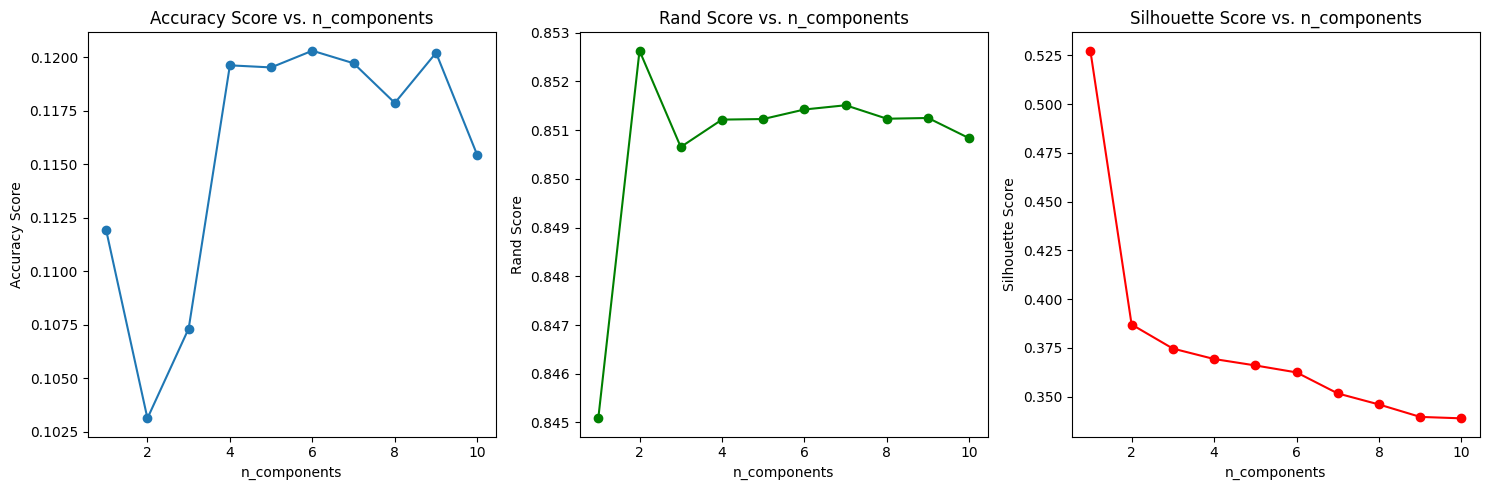

In [23]:
#################################
########## Question 6a ##########
#################################
print("Question 6a")

# After applying PCA, we now use the reduced-dimensionality data for clustering
# This is to see if reducing noise and less informative features improves clustering performance

# Fit k-Means to the PCA-transformed data
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=0)
kmeans_pca.fit(pca_transformed_data)

# Obtain the cluster assignments from the k-Means fitted on PCA-reduced data
cluster_assignments_pca = kmeans_pca.labels_

# Use the function defined earlier to translate these cluster assignments to the ground truth label space
translated_predicted_y_pca = translate_predicted_labels(cluster_assignments_pca, filtered_annotations)

# Calculate the same metrics as before to evaluate the quality of the clustering on the reduced-dimensionality data
# Accuracy
cm_pca = confusion_matrix(filtered_annotations, translated_predicted_y_pca)
acc_pca = accuracy(cm_pca)
print("Accuracy Score (PCA):", acc_pca)

# Rand Score
rand_sc_pca = rand_score(filtered_annotations, cluster_assignments_pca)
print("Rand Score (PCA):", rand_sc_pca)

# Silhouette Score
silhouette_sc_pca = silhouette_score(pca_transformed_data, cluster_assignments_pca)
print("Silhouette Score (PCA):", silhouette_sc_pca)
print("")



#################################
########## Question 6b ##########
#################################
print("Question 6b")

# We will now experiment with different numbers of principal components to see how it affects clustering performance

# Define the range of component numbers to try
n_components_range = range(1, 11)
accuracy_scores = []
rand_scores = []
silhouette_scores = []

# Loop over the range of component numbers
for n_components in n_components_range:
    # Apply PCA with the current number of components
    pca = PCA(n_components=n_components)
    pca_transformed_data = pca.fit_transform(filtered_image)

    # Fit k-Means to the PCA-reduced data
    kmeans_pca = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans_pca.fit(pca_transformed_data)
    cluster_assignments_pca = kmeans_pca.labels_

    # Translate the predicted labels to align with the ground truth
    translated_predicted_y_pca = translate_predicted_labels(cluster_assignments_pca, filtered_annotations)

    # Calculate and store the metrics for each number of components
    cm_pca = confusion_matrix(filtered_annotations, translated_predicted_y_pca)
    accuracy_scores.append(accuracy(cm_pca))
    rand_scores.append(rand_score(filtered_annotations, cluster_assignments_pca))
    silhouette_scores.append(silhouette_score(pca_transformed_data, cluster_assignments_pca))

# Plot the metrics as a function of the number of principal components
plt.figure(figsize=(15, 5))

# Plot for Accuracy Score
plt.subplot(1, 3, 1)
plt.plot(n_components_range, accuracy_scores, marker='o')
plt.title('Accuracy Score vs. n_components')
plt.xlabel('n_components')
plt.ylabel('Accuracy Score')

# Plot for Rand Score
plt.subplot(1, 3, 2)
plt.plot(n_components_range, rand_scores, marker='o', color='green')
plt.title('Rand Score vs. n_components')
plt.xlabel('n_components')
plt.ylabel('Rand Score')

# Plot for Silhouette Score
plt.subplot(1, 3, 3)
plt.plot(n_components_range, silhouette_scores, marker='o', color='red')
plt.title('Silhouette Score vs. n_components')
plt.xlabel('n_components')
plt.ylabel('Silhouette Score')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
